In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image
import vpi

fs = cv2.FileStorage("rectify_map_imx219_160deg_1080p.yaml", cv2.FILE_STORAGE_READ)

map_l = (
    fs.getNode('map_l_x').mat(),
    fs.getNode('map_l_y').mat()
)

map_r = (
    fs.getNode('map_r_x').mat(),
    fs.getNode('map_r_y').mat()
)

fs.release()

In [3]:
src_map_l = map_l[0]
idk_what_that_is_l = map_l[1]

map_l_y, map_l_x = map_l[0][:,:,0], map_l[0][:,:,1]
map_r_y, map_r_x = map_r[0][:,:,0], map_r[0][:,:,1]
map_r_x.shape

(1080, 1920)

In [25]:
# Reference map (identity mapping)
map_ref_x, map_ref_y = np.mgrid[0:1080:1, 0:1920:1]

## Remap displacement of pixels along X axis

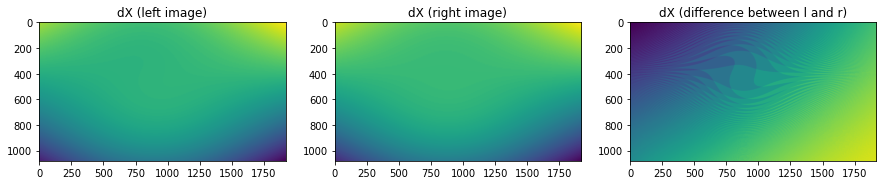

In [26]:
dx_l = map_l_x - map_ref_x
dx_r = map_r_x - map_ref_x

fig, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].imshow(dx_l)
axs[0].set_title('dX (left image)')
axs[1].imshow(dx_r)
axs[1].set_title('dX (right image)')
axs[2].imshow(dx_l-dx_r)
axs[2].set_title('dX (difference between l and r)')
plt.show()

## Remap displacement along Y axis

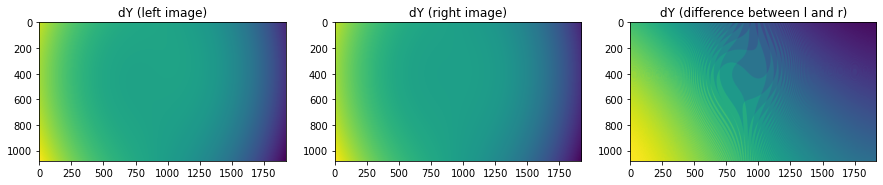

In [27]:
dy_l = map_l_y - map_ref_y
dy_r = map_r_y - map_ref_y

fig, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].imshow(dy_l)
axs[0].set_title('dY (left image)')
axs[1].imshow(dy_r)
axs[1].set_title('dY (right image)')
axs[2].imshow(dy_r-dy_l)
axs[2].set_title('dY (difference between l and r)')
plt.show()

## Combined displacement

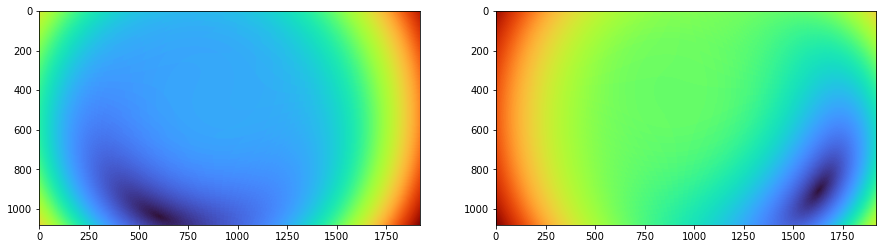

In [41]:
fig, axs = plt.subplots(1,2, figsize=(15,5))

d_total_l = np.sqrt(dx_l**2 + dy_l**2)
d_total_r = np.sqrt(dx_r**2 + dy_r**2)
axs[0].imshow(d_total_l, cmap='turbo')
axs[1].imshow(d_total_r, cmap='turbo')